# General simulation of the matrix operator norm bound

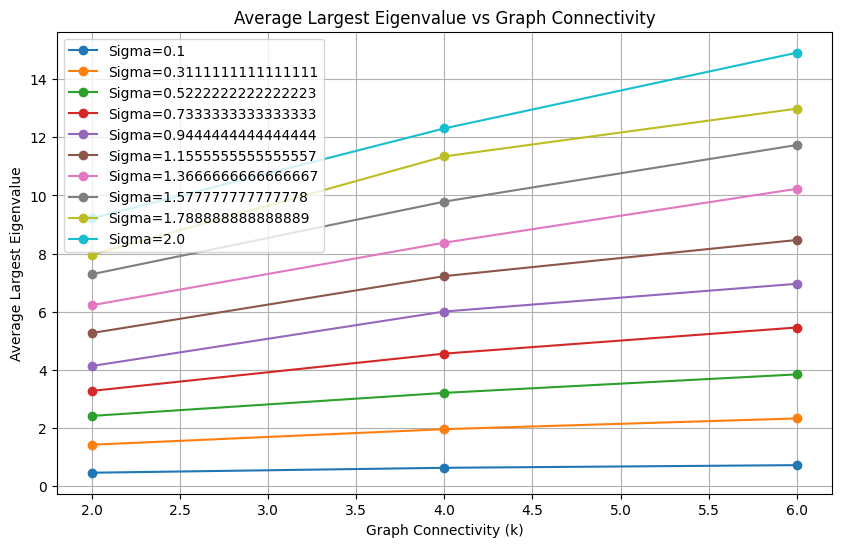

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a connected graph and derive the Kronecker product matrix
def generate_kron_matrix(num_nodes, k, p, sigma):
    # Generate the connected Watts-Strogatz small-world graph
    G = nx.connected_watts_strogatz_graph(num_nodes, k, p)

    # Derive the adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()

    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    # Generate the random variable phi for each entry and compute the matrix D
    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]  # Store matrices properly

    for i in range(n):
        for j in range(i, n):  # Only loop for upper triangle
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T  # Assign transposed version for symmetric structure
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    # Use the Kronecker product to fill the entries of the adjacency matrix with D
    kron_matrix = np.zeros((3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Parameters
num_nodes = 100
k_values = [2, 4, 6]  # Different values for k (connectivity)
p = 0.1  # Probability of rewiring
sigma_values = np.linspace(0.1, 2.0, 10)
num_trials = 10  # Number of trials for each parameter set

# Run experiments and collect results
results = []

for k in k_values:
    for sigma in sigma_values:
        eigenvalues = []
        for _ in range(num_trials):
            kron_matrix = generate_kron_matrix(num_nodes, k, p, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            eigenvalues.append(largest_eigenvalue)
        avg_eigenvalue = np.mean(eigenvalues)
        results.append((k, sigma, avg_eigenvalue))

# Convert results to numpy array for plotting
results = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
for sigma in sigma_values:
    subset = results[results[:, 1] == sigma]
    ax.plot(subset[:, 0], subset[:, 2], marker='o', label=f'Sigma={sigma}')
ax.set_xlabel('Graph Connectivity (k)')
ax.set_ylabel('Average Largest Eigenvalue')
ax.set_title('Average Largest Eigenvalue vs Graph Connectivity')
ax.legend()
ax.grid(True)
plt.show()


# Fix graph connectivity, simulation on different sigma

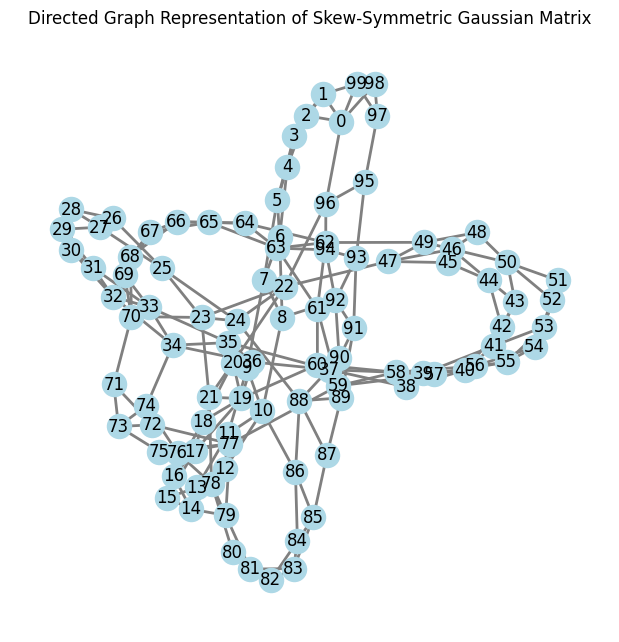

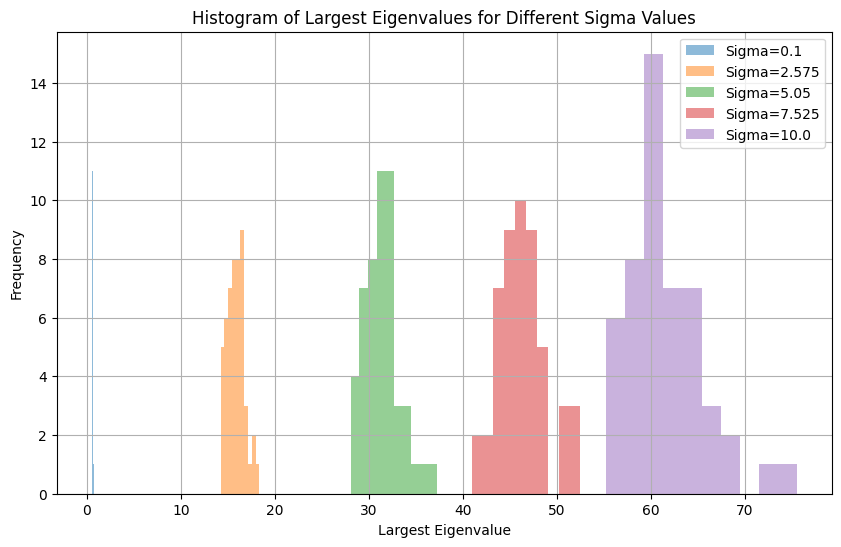

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a connected graph and derive the Kronecker product matrix
def generate_kron_matrix(adj_matrix, sigma):
    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    # Generate the random variable phi for each entry and compute the matrix D
    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]  # Store matrices properly

    for i in range(n):
        for j in range(i, n):  # Only compute for upper triangle
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T  # Assign the transposed version for symmetry
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    # Use the Kronecker product to fill the entries of the adjacency matrix with D
    kron_matrix = np.zeros((3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Parameters
num_nodes = 100
k = 4  # Fixed value for k (connectivity)
p = 0.1  # Probability of rewiring
sigma_values = np.linspace(0.1, 10.0, 5)
num_trials = 50  # Number of trials for each parameter set

# Generate the connected Watts-Strogatz small-world graph once
G = nx.connected_watts_strogatz_graph(num_nodes, k, p)
adj_matrix = nx.adjacency_matrix(G).todense()

# Draw Directed Graph
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G)  # Compute node positions
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", width=2, arrows=True)
plt.title("Directed Graph Representation of Skew-Symmetric Gaussian Matrix")
plt.show()

# Run experiments and collect results
results = []

for sigma in sigma_values:
    eigenvalues = []
    for _ in range(num_trials):
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        eigenvalues.append(largest_eigenvalue)
    results.append((sigma, eigenvalues))

# Plot the results as histograms
fig, ax = plt.subplots(figsize=(10, 6))
for sigma, eigenvalues in results:
    ax.hist(eigenvalues, bins=10, alpha=0.5, label=f'Sigma={sigma}')
ax.set_xlabel('Largest Eigenvalue')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Largest Eigenvalues for Different Sigma Values')
ax.legend()
ax.grid(True)
plt.show()


# Fix sigma, simulation on differnet graph connectivity

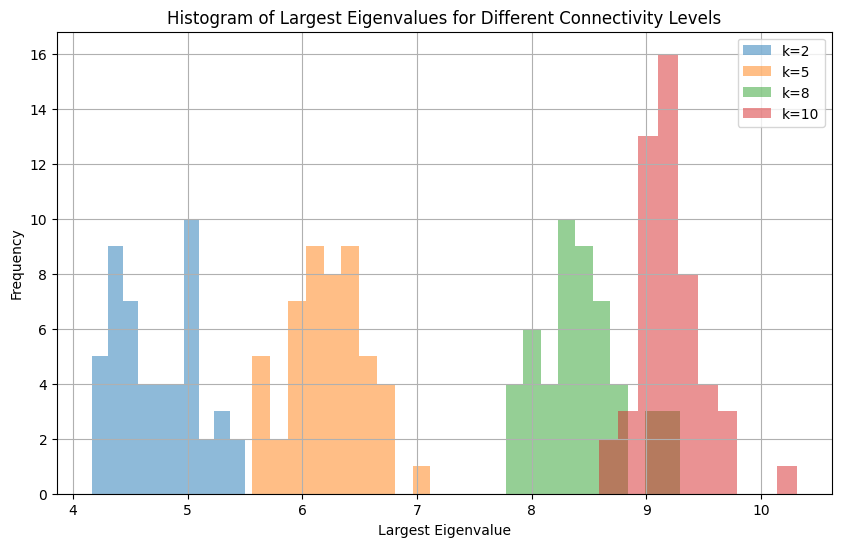

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    # Generate the random variable phi for each entry and compute the matrix D
    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]  # Store matrices properly

    for i in range(n):
        for j in range(i, n):  # Compute only for the upper triangle
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T  # Ensure block symmetry
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    # Use the Kronecker product to fill the entries of the adjacency matrix with D
    kron_matrix = np.zeros((3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Parameters
num_nodes = 100
k_values = [2, 5, 8, 10]  # Different values for k (connectivity)
p = 0.1  # Probability of rewiring
sigma = 1.0  # Fixed standard deviation for Gaussian entries
num_trials = 50  # Number of trials for each parameter set

# Run experiments and collect results
results = []

for k in k_values:
    # Generate the connected Watts-Strogatz small-world graph once
    G = nx.connected_watts_strogatz_graph(num_nodes, k, p)
    adj_matrix = nx.adjacency_matrix(G).todense()

    eigenvalues = []
    for _ in range(num_trials):
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        eigenvalues.append(largest_eigenvalue)
    results.append((k, eigenvalues))

# Plot the results as histograms
fig, ax = plt.subplots(figsize=(10, 6))
for k, eigenvalues in results:
    ax.hist(eigenvalues, bins=10, alpha=0.5, label=f'k={k}')
ax.set_xlabel('Largest Eigenvalue')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Largest Eigenvalues for Different Connectivity Levels')
ax.legend()
ax.grid(True)
plt.show()


# Compare on theoretic bound, from general Matrix Gaussian Series
## Fix sigma = 1, change the graph connectivity

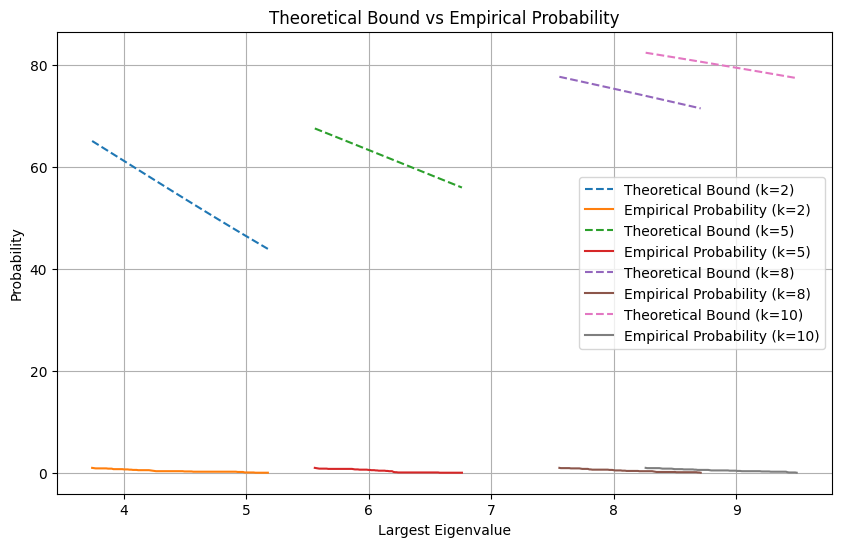

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    # Generate the random variable phi for each entry and compute the matrix D
    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]  # Store matrices properly

    for i in range(n):
        for j in range(i, n):  # Compute only for the upper triangle
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T  # Ensure block symmetry
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    # Use the Kronecker product to fill the entries of the adjacency matrix with D
    kron_matrix = np.zeros((3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]  # Number of nodes
    k = np.count_nonzero(adj_matrix) // 2  # Number of edges (undirected graph)
    
    # Store individual B matrices
    B_matrices = []

    # Initialize sum of B matrices
    sum_B = np.zeros((3 * n, 3 * n))

    edge_list = np.array(np.triu(adj_matrix).nonzero()).T  # Get unique edges from upper triangle

    for idx, (i, j) in enumerate(edge_list):
        # Generate a symmetric matrix B
        phi = np.random.normal(0, sigma, 3)
        B = np.zeros((3 * n, 3 * n))

        # Define the symmetric block entry for (i, j) and (j, i)
        B_block = S1 + S2 + S3

        # Insert into the large matrix
        B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
        B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T  # Ensure symmetry
        
        B_matrices.append(B)
        sum_B += B  # Sum up all B matrices

    # Compute sum_B * sum_B^T
    sum_B_BT = sum_B @ sum_B.T

    # Compute the operator norm (largest singular value)
    operator_norm = np.linalg.norm(sum_B_BT, ord=2)  # Spectral norm

    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute the theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (num_nodes + num_nodes) * np.exp(-t**2 / (2 * vZ))

# Parameters
num_nodes = 50
k_values = [2, 5, 8, 10]  # Different values for k (connectivity)
p = 0.1  # Probability of rewiring
sigma = 1.0  # Fixed standard deviation for Gaussian entries
num_trials = 20  # Number of trials for each parameter set

# Run experiments and collect results
results = []

for k in k_values:
    # Generate the connected Watts-Strogatz small-world graph once
    G = nx.connected_watts_strogatz_graph(num_nodes, k, p)
    adj_matrix = nx.adjacency_matrix(G).todense()
    V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
    eigenvalues = []
    variances = []
    for _ in range(num_trials):
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        eigenvalues.append(largest_eigenvalue)
    results.append((k, eigenvalues, V_z))

# Plot the theoretical bound vs empirical probability
fig, ax = plt.subplots(figsize=(10, 6))
for k, eigenvalues, V_z in results:
    t_values = np.linspace(min(eigenvalues), max(eigenvalues), 100)
    bound_values = theoretical_bound(t_values, num_nodes, V_z)

    # Compute empirical probability
    empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
    
    ax.plot(t_values, bound_values, label=f'Theoretical Bound (k={k})', linestyle='dashed')
    ax.plot(t_values, empirical_probs, label=f'Empirical Probability (k={k})', linestyle='solid')

ax.set_xlabel('Largest Eigenvalue')
ax.set_ylabel('Probability')
ax.set_title('Theoretical Bound vs Empirical Probability')
ax.legend()
ax.grid(True)
plt.show()


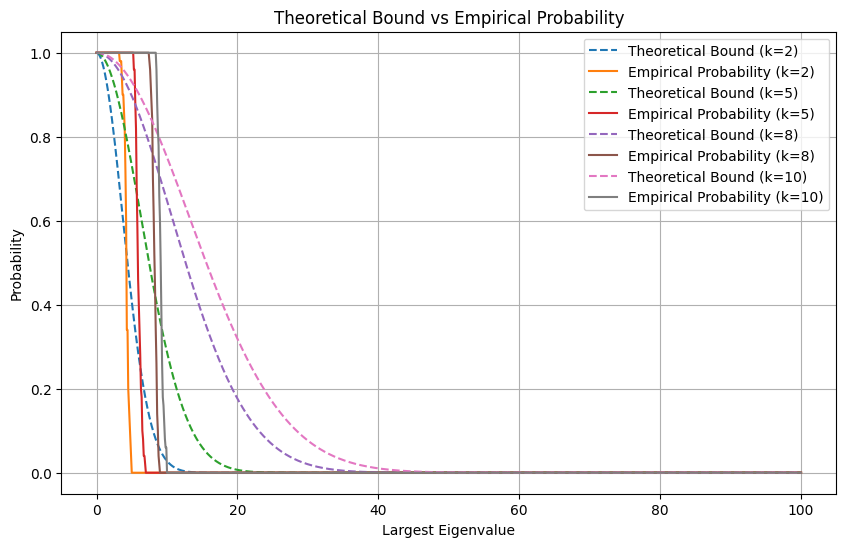

In [48]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    # Generate the random variable phi for each entry and compute the matrix D
    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]  # Store matrices properly

    for i in range(n):
        for j in range(i, n):  # Compute only for the upper triangle
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T  # Ensure block symmetry
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    # Use the Kronecker product to fill the entries of the adjacency matrix with D
    kron_matrix = np.zeros((3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]  # Number of nodes
    k = np.count_nonzero(adj_matrix) // 2  # Number of edges (undirected graph)

    # Store individual B matrices
    B_matrices = []

    # Initialize sum of B matrices
    sum_B = np.zeros((3 * n, 3 * n))

    edge_list = np.array(np.triu(adj_matrix).nonzero()).T  # Get unique edges from upper triangle

    for idx, (i, j) in enumerate(edge_list):
        # Generate a symmetric matrix B
        phi = np.random.normal(0, sigma, 3)
        B = np.zeros((3 * n, 3 * n))

        # Define the symmetric block entry for (i, j) and (j, i)
        B_block = S1 + S2 + S3

        # Insert into the large matrix
        B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
        B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T  # Ensure symmetry

        B_matrices.append(B)
        sum_B += B  # Sum up all B matrices

    # Compute sum_B * sum_B^T
    sum_B_BT = sum_B @ sum_B.T

    # Compute the operator norm (largest singular value)
    operator_norm = np.linalg.norm(sum_B_BT, ord=2)  # Spectral norm

    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute the theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (num_nodes + num_nodes) * np.exp(-t**2 / (2 * vZ))

# Parameters
num_nodes = 50
k_values = [2, 5, 8, 10]  # Different values for k (connectivity)
p = 0.1  # Probability of rewiring
sigma = 1.0  # Fixed standard deviation for Gaussian entries
num_trials = 50  # Number of trials for each parameter set

# Run experiments and collect results
results = []

for k in k_values:
    # Generate the connected Watts-Strogatz small-world graph once
    G = nx.connected_watts_strogatz_graph(num_nodes, k, p)
    adj_matrix = nx.adjacency_matrix(G).todense()
    V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
    eigenvalues = []
    variances = []
    for _ in range(num_trials):
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        eigenvalues.append(largest_eigenvalue)
    results.append((k, eigenvalues, V_z))

# Plot the theoretical bound vs empirical probability
fig, ax = plt.subplots(figsize=(10, 6))
for k, eigenvalues, V_z in results:
    t_values = np.linspace(0, 100, 1000)

    bound_values = theoretical_bound(t_values, num_nodes, V_z) / 100

    # Compute empirical probability
    empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
    empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)

    ax.plot(t_values, bound_values, label=f'Theoretical Bound (k={k})', linestyle='dashed')
    ax.plot(t_values, empirical_probs, label=f'Empirical Probability (k={k})', linestyle='solid')

ax.set_xlabel('Largest Eigenvalue')
ax.set_ylabel('Probability')
ax.set_title('Theoretical Bound vs Empirical Probability')
ax.legend()
ax.grid(True)
plt.show()

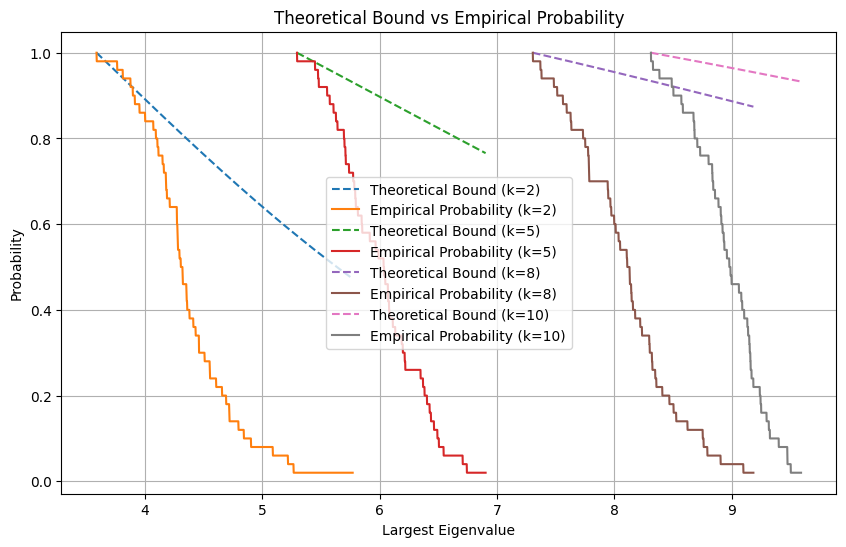

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    # Generate the random variable phi for each entry and compute the matrix D
    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]  # Store matrices properly

    for i in range(n):
        for j in range(i, n):  # Compute only for the upper triangle
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T  # Ensure block symmetry
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    # Use the Kronecker product to fill the entries of the adjacency matrix with D
    kron_matrix = np.zeros((3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    # Define the fixed matrices S1, S2, and S3
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]  # Number of nodes
    k = np.count_nonzero(adj_matrix) // 2  # Number of edges (undirected graph)

    # Store individual B matrices
    B_matrices = []

    # Initialize sum of B matrices
    sum_B = np.zeros((3 * n, 3 * n))

    edge_list = np.array(np.triu(adj_matrix).nonzero()).T  # Get unique edges from upper triangle

    for idx, (i, j) in enumerate(edge_list):
        # Generate a symmetric matrix B
        phi = np.random.normal(0, sigma, 3)
        B = np.zeros((3 * n, 3 * n))

        # Define the symmetric block entry for (i, j) and (j, i)
        B_block = S1 + S2 + S3

        # Insert into the large matrix
        B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
        B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T  # Ensure symmetry

        B_matrices.append(B)
        sum_B += B  # Sum up all B matrices

    # Compute sum_B * sum_B^T
    sum_B_BT = sum_B @ sum_B.T

    # Compute the operator norm (largest singular value)
    operator_norm = np.linalg.norm(sum_B_BT, ord=2)  # Spectral norm

    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute the theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (num_nodes + num_nodes) * np.exp(-t**2 / (2 * vZ))

# Parameters
num_nodes = 50
k_values = [2, 5, 8, 10]  # Different values for k (connectivity)
p = 0.1  # Probability of rewiring
sigma = 1.0  # Fixed standard deviation for Gaussian entries
num_trials = 50  # Number of trials for each parameter set

# Run experiments and collect results
results = []

for k in k_values:
    # Generate the connected Watts-Strogatz small-world graph once
    G = nx.connected_watts_strogatz_graph(num_nodes, k, p)
    adj_matrix = nx.adjacency_matrix(G).todense()
    V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
    eigenvalues = []
    variances = []
    for _ in range(num_trials):
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        eigenvalues.append(largest_eigenvalue)
    results.append((k, eigenvalues, V_z))

# Plot the theoretical bound vs empirical probability
fig, ax = plt.subplots(figsize=(10, 6))
for k, eigenvalues, V_z in results:
    t_values = np.linspace(min(eigenvalues), max(eigenvalues), 1000)
    bound_values = theoretical_bound(t_values, num_nodes, V_z)
    bound_values = bound_values / np.max(bound_values)  # Normalize to 0-1

    # Compute empirical probability
    empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
    empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)  # Normalize to 0-1

    ax.plot(t_values, bound_values, label=f'Theoretical Bound (k={k})', linestyle='dashed')
    ax.plot(t_values, empirical_probs, label=f'Empirical Probability (k={k})', linestyle='solid')

ax.set_xlabel('Largest Eigenvalue')
ax.set_ylabel('Probability')
ax.set_title('Theoretical Bound vs Empirical Probability')
ax.legend()
ax.grid(True)
plt.show()

# Random Geometric Graph, fixed sigma 

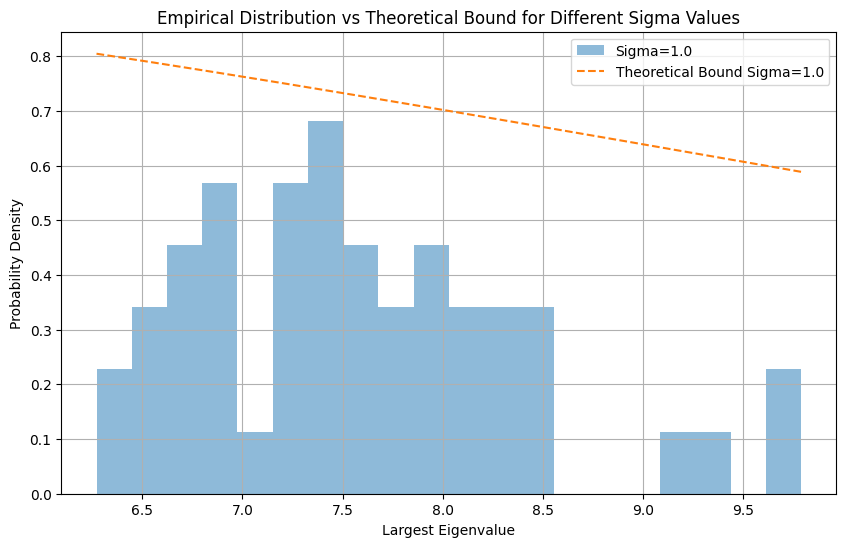

In [30]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])
    
    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))
    
    kron_matrix = np.zeros((3 * n, 3 * n))
    
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]
    
    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])
    
    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T
    
    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        B_block = S1 + S2 + S3
        B = np.zeros((3 * n, 3 * n))
        B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
        B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
        sum_B += B
    
    sum_B_BT = sum_B @ sum_B.T
    operator_norm = np.linalg.norm(sum_B_BT, ord=2)
    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute the theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (num_nodes + num_nodes) * np.exp(-t**2 / (2 * vZ))

# Parameters
num_nodes = 50  # Number of nodes
sigma_values = [1.0]  # Range of sigma values
num_trials = 50  # Number of trials
W_max = 10**3  # Maximum weight

# Run experiments and collect results
results = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(num_trials):
        r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
        G = nx.random_geometric_graph(num_nodes, r)
        adj_matrix = nx.adjacency_matrix(G).todense()
        
        V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        results[sigma].append((largest_eigenvalue, V_z))

# Plot the empirical distribution of the largest eigenvalues
fig, ax = plt.subplots(figsize=(10, 6))
for sigma, values in results.items():
    eigenvalues = [v[0] for v in values]
    V_z = values[0][1]  # Take V_z from the first trial as representative
    t_values = np.linspace(min(eigenvalues), max(eigenvalues), 1000)
    bound_values = theoretical_bound(t_values, num_nodes, V_z)
    bound_values = bound_values / 100
    
    ax.hist(eigenvalues, bins=20, density=True, alpha=0.5, label=f"Sigma={sigma}")
    ax.plot(t_values, bound_values, linestyle="dashed", label=f"Theoretical Bound Sigma={sigma}")

ax.set_xlabel("Largest Eigenvalue")
ax.set_ylabel("Probability Density")
ax.set_title("Empirical Distribution vs Theoretical Bound for Different Sigma Values")
ax.legend()
ax.grid(True)

plt.show()


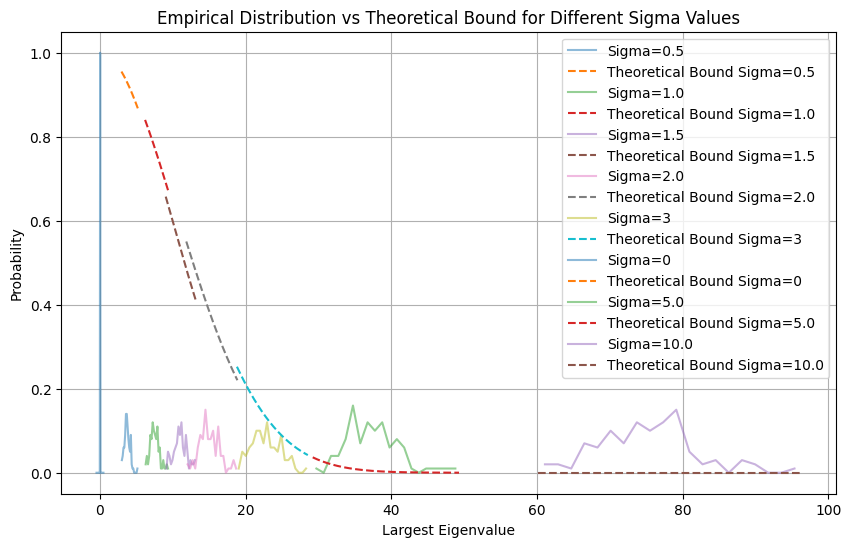

In [36]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))

    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        B_block = S1 + S2 + S3
        B = np.zeros((3 * n, 3 * n))
        B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
        B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
        sum_B += B

    sum_B_BT = sum_B @ sum_B.T
    operator_norm = np.linalg.norm(sum_B_BT, ord=2)
    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute the theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (num_nodes + num_nodes) * np.exp(-t**2 / (2 * vZ))

# Parameters
num_nodes = 50  # Number of nodes
sigma_values = [0.5, 1.0, 1.5, 2.0, 3,0, 5.0, 10.0]  # Range of sigma values
num_trials = 100  # Number of trials
W_max = 10**3  # Maximum weight

# Run experiments and collect results
results = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(num_trials):
        r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
        G = nx.random_geometric_graph(num_nodes, r)
        adj_matrix = nx.adjacency_matrix(G).todense()

        V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        results[sigma].append((largest_eigenvalue, V_z))

# Plot the empirical distribution of the largest eigenvalues
fig, ax = plt.subplots(figsize=(10, 6))
for sigma, values in results.items():
    eigenvalues = [v[0] for v in values]
    V_z = values[0][1]  # Take V_z from the first trial as representative
    t_values = np.linspace(min(eigenvalues), max(eigenvalues), 1000)
    bound_values = theoretical_bound(t_values, num_nodes, V_z)
    bound_values = bound_values / 100

    hist, bins = np.histogram(eigenvalues, bins=20)
    hist = hist / num_trials  # Normalize to the total number of trials
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    ax.plot(bin_centers, hist, alpha=0.5, label=f"Sigma={sigma}")
    ax.plot(t_values, bound_values, linestyle="dashed", label=f"Theoretical Bound Sigma={sigma}")

ax.set_xlabel("Largest Eigenvalue")
ax.set_ylabel("Probability")
ax.set_title("Empirical Distribution vs Theoretical Bound for Different Sigma Values")
ax.legend()
ax.grid(True)

plt.show()

# Large node number

In [45]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))

    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))

    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        B_block = S1 + S2 + S3
        B = np.zeros((3 * n, 3 * n))
        B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
        B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
        sum_B += B

    sum_B_BT = sum_B @ sum_B.T
    operator_norm = np.linalg.norm(sum_B_BT, ord=2)
    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute the theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (num_nodes + num_nodes) * np.exp(-t**2 / (2 * vZ))

def compute_theoretic_bound(d, operator_norm):
    return np.sqrt(2 * operator_norm * np.log(2 * d))

# Parameters
num_nodes = 500  # Number of nodes
sigma_values = [1.0, 2.0]  # Range of sigma values
num_trials = 50  # Number of trials
W_max = 10**3  # Maximum weight

# Run experiments and collect results
results = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(num_trials):
        r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
        G = nx.random_geometric_graph(num_nodes, r)
        adj_matrix = nx.adjacency_matrix(G).todense()

        V_z = generate_symmetric_matrix_sum(adj_matrix)
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        results[sigma].append((largest_eigenvalue, V_z))

# Plot the empirical distribution of the largest eigenvalues
fig, axes = plt.subplots(len(sigma_values), 1, figsize=(10, 6 * len(sigma_values)))
for ax, (sigma, values) in zip(axes, results.items()):
    eigenvalues = [v[0] for v in values]
    V_z = values[0][1]  # Take V_z from the first trial as representative
    t_values = np.linspace(1, 100, 1000)
    bound_values = theoretical_bound(t_values, num_nodes, V_z)
    bound_values = bound_values / 100

    # Compute empirical probability (CCDF)
    empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]

    ax.plot(t_values, empirical_probs, alpha=0.5, label=f"Sigma={sigma}")
    ax.plot(t_values, bound_values, linestyle="dashed", label=f"Theoretical Bound Sigma={sigma}")
    ax.set_xlabel("Largest Eigenvalue")
    ax.set_ylabel("Probability")
    ax.set_title(f"Empirical Distribution vs Theoretical Bound for Sigma={sigma}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

# Adding expectation bound

In [47]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])
    
    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]
    
    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))
    
    kron_matrix = np.zeros((3 * n, 3 * n))
    
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]
    
    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])
    
    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T
    
    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        B_block = S1 + S2 + S3
        B = np.zeros((3 * n, 3 * n))
        B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
        B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
        sum_B += B
    
    sum_B_BT = sum_B @ sum_B.T
    operator_norm = np.linalg.norm(sum_B_BT, ord=2)
    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute the theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (num_nodes + num_nodes) * np.exp(-t**2 / (2 * vZ))

# Function to compute the theoretical bound of the expectation of the operator norm
def compute_theoretic_bound(d, operator_norm):
    return np.sqrt(2 * operator_norm * np.log(2 * d))

# Parameters
num_nodes = 500  # Number of nodes
sigma_values = [1.0]  # Range of sigma values
num_trials = 50  # Number of trials
W_max = 10**3  # Maximum weight

# Run experiments and collect results
results = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(num_trials):
        r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
        G = nx.random_geometric_graph(num_nodes, r)
        adj_matrix = nx.adjacency_matrix(G).todense()
        
        V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        results[sigma].append((largest_eigenvalue, V_z))

# Plot the empirical distribution of the largest eigenvalues
fig, ax = plt.subplots(figsize=(10, 6))
for sigma, values in results.items():
    eigenvalues = [v[0] for v in values]
    V_z = values[0][1]  # Take V_z from the first trial as representative
    t_values = np.linspace(min(eigenvalues), max(eigenvalues), 1000)
    bound_values = theoretical_bound(t_values, num_nodes, V_z)
    bound_values = bound_values / 100
    
    # Compute the theoretical bound of the expectation of the operator norm
    operator_norm_bound = compute_theoretic_bound(num_nodes, V_z)
    
    ax.hist(eigenvalues, bins=20, density=True, alpha=0.5, label=f"Sigma={sigma}")
    ax.plot(t_values, bound_values, linestyle="dashed", label=f"Theoretical Bound Sigma={sigma}")
    ax.axvline(operator_norm_bound, color='r', linestyle='dotted', label=f"Operator Norm Bound Sigma={sigma}")

ax.set_xlabel("Largest Eigenvalue")
ax.set_ylabel("Probability Density")
ax.set_title("Empirical Distribution vs Theoretical Bound for Different Sigma Values")
ax.legend()
ax.grid(True)

plt.show()

KeyboardInterrupt: 